# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!
  
#### Import all the necessary libraries here:


In [2]:
import pandas as pd
import numpy as np

# Challenge 1

#### Read the `employees` dataset from Ironhack's database:
* db: `employees`
* table: `employees`

Save your data in a variable called `employees`.

In [4]:
employees = pd.read_csv("employees.csv", sep=";")
employees.head()

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55


#### What's the mean `Salary` by `Department`?
**Tip**: There are 2 ways to do it: with or without pivot tables. Do it both ways. 

In [5]:
# Method 1
employees.groupby(["Department"]).mean()

,Years,Salary
Department,,
HR,4.666667,45.00
IT,4.500000,48.75
Sales,2.500000,55.00


In [6]:
# Method 2

employees.pivot_table(index=["Department"])

,Salary,Years
Department,,
HR,45.00,4.666667
IT,48.75,4.500000
Sales,55.00,2.500000


#### Now, group the data by more than one column. Use Pandas pivot table function to select the mean `Salary` by `Department` and `Title`.

In [7]:
employees.pivot_table(values=["Salary"], index=["Department", "Title"])

Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

#### Display the number of `Years` of work experience and the `Salary` for each `Title`. Add `Years` as a column in your pivot table.
**Hint**: Use Pandas documentation to explore the [pivot table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) function.

In [8]:
employees.pivot_table(index=["Title"])

,Salary,Years
Title,,
VP,70.000000,8.00
analyst,32.500000,2.25
associate,56.666667,4.00


#### Find the mean `Salary` and number of employees in each `Department` and for each job `Title`.

In [11]:
# Create the table for Salary as a function of department and title
employees_salary = employees.pivot_table(values=["Salary", "Name"], index=["Department", "Title"], aggfunc=[sum,len])
employees_salary.head()

sum  len       
                     Salary Name Salary
Department Title                       
HR         VP            70    1      1
           analyst       65    2      2
IT         VP            70    1      1
           analyst       65    2      2
           associate     60    1      1

#### For each `Department` and each job `Title`, find the `Salary` median, minimum, maximum and standard deviation. Comment your results.

In [57]:
employees.pivot_table(values=["Salary"], index=["Department", "Title"], aggfunc=[np.median, min, max, np.std])

median    min    max       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
IT         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
           associate   60.0     60     60       NaN
Sales      associate   55.0     55     55  0.000000

In [54]:
"""
Due to the fact that there is not many employees in the data set the results are not very menaingful. In lots of 
cases the minimu is equal to the maximum (because there is just one employee in this category) and the standard 
deviation is 0
"""

'\nDue to the fact that there is not many employees in the data set the results are not very menaingful. In lots of \ncases the minimu is equal to the maximum (because there is just one employee in this category) and the standard \ndeviation is 0\n'

#### Based on your comments, fill the missing values with an appropriate value.

In [19]:
# I will fill the standard deviation values with 0.
employees.pivot_table(values=["Salary"], index=["Department", "Title"], aggfunc=[np.median, min, max, np.std]).fillna(0)

median    min    max       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP          70.0     70     70  0.000000
           analyst     32.5     30     35  3.535534
IT         VP          70.0     70     70  0.000000
           analyst     32.5     30     35  3.535534
           associate   60.0     60     60  0.000000
Sales      associate   55.0     55     55  0.000000

#### The stake holders want to know, for each `Department`, the number of employees and how much money is spent on salaries. Could you provide that information? 

In [12]:
employees.pivot_table(values=["Salary", "Name"], index=["Department", "Title"], aggfunc=[np.sum,len])

sum  len       
                     Salary Name Salary
Department Title                       
HR         VP            70    1      1
           analyst       65    2      2
IT         VP            70    1      1
           analyst       65    2      2
           associate     60    1      1
Sales      associate    110    2      2

#### For each `Department` and `Title`, find the the total years of work experience and the mean `Salary`.

In [18]:
employees.pivot_table(values=["Years", "Salary"], index=["Department", "Title"], aggfunc=[len, np.median])

len       median      
                     Salary Years Salary Years
Department Title                              
HR         VP             1     1   70.0   8.0
           analyst        2     2   32.5   3.0
IT         VP             1     1   70.0   8.0
           analyst        2     2   32.5   1.5
           associate      1     1   60.0   7.0
Sales      associate      2     2   55.0   2.5

## Bonus Challenge 1

#### Compute the mean `Salary` after removing the maximum `Salary` for each `Department`. Create the appropriate pivot table.
**Hint**: Write a custom function.

In [ ]:
# your code here

# Challenge 2

#### Read the `fitbit` dataset from Ironhack's database:
* db: `fitbit`
* table: `fitbit`

Save your data in a variable called `fitbit`.

In [81]:
fitbit = pd.read_csv("fitbit.csv", sep=";")
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491


#### Explore you dataset in terms of data types and descriptive statistics.
**Hint**: Use Pandas functions from previous lectures.

In [82]:
# Explore the types
fitbit.dtypes

Date                       object
Calorie burned              int64
Steps                       int64
Distance                  float64
Floors                      int64
Minutes Sedentary         float64
Minutes Lightly Active      int64
Minutes Fairly Active       int64
Minutes Very Active         int64
Activity Calories           int64
MinutesOfSleep              int64
MinutesOfBeingAwake         int64
NumberOfAwakings            int64
LengthOfRestInMinutes       int64
dtype: object

In [83]:
# Explore the main statistical values
fitbit.describe()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185,321.343324
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622,170.786726
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000,248.000000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000,370.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000,440.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000,607.000000


#### You suspect that there must be a linear relationship between the `Minutes Very Active` and the `Steps`. Compute the correlation between these variables.

In [84]:
fitbit["Minutes Very Active"].corr(fitbit["Steps"])

0.5714518481062608

#### Use matplotlib to visually plot `Minutes Very active` vs `Steps`. We'll work with matplotlib next week. As a first introduction, uncomment and complete the following code. You need to replace the # symbol for the correct function arguments. 

In [7]:
import matplotlib.pyplot as plt;

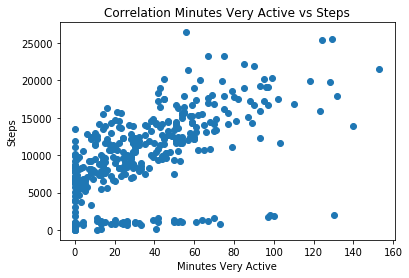

In [88]:
plt.scatter(fitbit["Minutes Very Active"], fitbit["Steps"])
plt.title("Correlation Minutes Very Active vs Steps")
plt.xlabel("Minutes Very Active")
plt.ylabel("Steps")
plt.show()


#### What can you say about `Minutes Very Active` and `Steps`? Write a comment below.

In [ ]:
"""
It looks like there is a positive correlation between the amount of Minutes Very Active and the number of steps.
But we can see a line of points at the bottom of the graph. We would need to investigate it to see if they need 
to be removed in case they are due to an error.
"""

#### We also suspect that there must be a linear relationship between the `Minutes Sedentary` and the `Steps`. Compute the correlation between these variables.

In [89]:
fitbit["Minutes Sedentary"].corr(fitbit["Steps"])

0.07690608062990091

#### Use matplotlib to visually plot `Minutes Sedentary` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

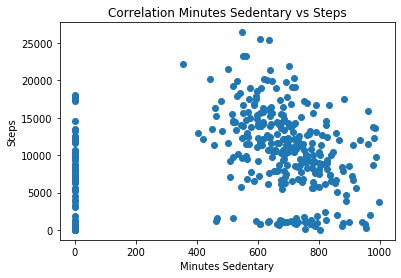

In [90]:
plt.scatter(fitbit["Minutes Sedentary"], fitbit["Steps"])
plt.title("Correlation Minutes Sedentary vs Steps")
plt.xlabel("Minutes Sedentary")
plt.ylabel("Steps")
plt.show()

In [ ]:
"""
There is not a clear correlation between the Minutes Sedentary and Steps
"""

#### We also suspect that there must be a linear relationship between the `MinutesOfSleep` and the `Steps`. Compute the correlation between these variables.

In [91]:
fitbit["MinutesOfSleep"].corr(fitbit["Steps"])

0.1309856595083638

#### Use matplotlib to visually plot `MinutesOfSleep` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

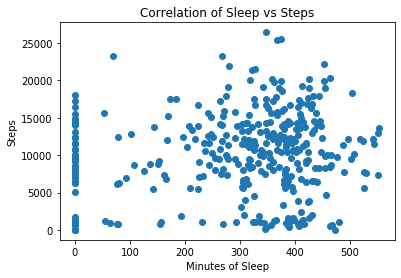

In [92]:
plt.scatter(fitbit["MinutesOfSleep"], fitbit["Steps"])
plt.title("Correlation of Sleep vs Steps")
plt.xlabel("Minutes of Sleep")
plt.ylabel("Steps")
plt.show()

In [ ]:
"""
There is not a strong correlation between the Minutes of sleep and the Steps
"""

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`.

In [95]:
columns = ['Calorie burned', 'Steps', 'Floors', 'Minutes Sedentary', 'Minutes Very Active', 'MinutesOfSleep']

In [107]:
cor_fit = fitbit[columns].corr()
cor_fit

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


#### Based on the result of the correlation matrix, which of the features are highly correlated with variable `Steps`?
**Hint**: sort the correlations of `Steps` vs the rest of the features in descending order. You can use Pandas `sort_values`. 

In [ ]:
# Only Minutes Very Active is correlated to Steps.

# Challenge 3

#### Read the `time_grades` dataset from Ironhack's database:
* db: `time_grades`
* table: `time_grades`

Save your data in a variable called `time_grades`.

In [3]:
time_grades = pd.read_csv("time_grades.csv")
time_grades.head()

,Unnamed: 0,Name,Study time,Grade
0,0,Jose,4,4
1,1,Maria,9,7
2,2,David,8,9
3,3,Sonia,10,7
4,4,Samuel,20,9


#### Show visually the frequency distribution of the `time_grades` dataset.

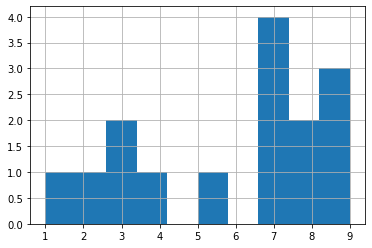

In [8]:
time_grades["Grade"].hist(bins=10)

#### Is there a correlation between `Study time` and `Grade`? Use both Pearson and Spearman correlations and comment your results.

In [5]:
# Pearson correlation
time_grades["Study time"].corr(time_grades["Grade"])

0.7980456073578858

In [6]:
# Spearman correlation
time_grades["Study time"].corr(time_grades["Grade"], method = "spearman")


0.819658753036942

In [ ]:
"""
The 2 correlation coefficients are very close
"""

#### Use matplotlib to visually plot `Study time` vs `Grade`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

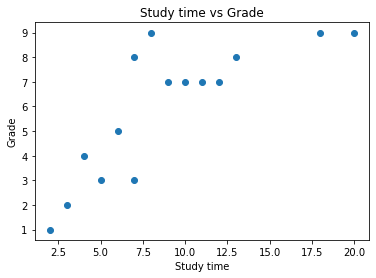

In [9]:
plt.scatter(time_grades["Study time"], time_grades["Grade"])
plt.title("Study time vs Grade")
plt.xlabel("Study time")
plt.ylabel("Grade")
plt.show()

In [ ]:
"""
There is a positive correlation between Study time and grade
"""

#### Could you explain the difference between Pearson and Spearman correlations?

In [ ]:
"""
The Pearson correlation is more suited to linear correlations
The Spearman on is for correlations where one value increase the other increases too but when it doesn' t stay
linear. In the case we just studied now I think the Spearman one is more adapted than the Pearson one.
"""